<a href="https://colab.research.google.com/github/yuli-stack/intermediate-python-course/blob/master/%E4%BD%A0%E5%A6%88%E7%9A%84%EF%BC%8C%E5%A5%BD%E5%A5%BD%E6%90%9E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models

In [16]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as K
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D

In [17]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [18]:
import os
import glob
import shutil

source_dir = '/content/gdrive/MyDrive/dental_project'  # adjust this path to your Google Drive folder where zip files are
target_dir = '/content'  # adjust this to the path of your new folder
os.makedirs(target_dir, exist_ok=True)  # create target_dir if not exist

zip_files = glob.glob(os.path.join(source_dir, 'Excellent.zip'))  # this will match any zip file named with two digits

for file in zip_files:
    shutil.copy(file, target_dir)  # copies the zip files to the new directory


In [19]:
import os
import zipfile

folder_path = '/content'  # replace with your folder path

# list all files in the folder
files = os.listdir(folder_path)

for file in files:
    # check if the file is a zip file
    if file.endswith('.zip'):
        # construct full file path
        file_path = os.path.join(folder_path, file)
        # create a ZipFile object
        with zipfile.ZipFile(file_path, 'r') as zip_ref:
            # create a sub-folder for this zip file
            subfolder_path = os.path.join(folder_path, os.path.splitext(file)[0])
            os.makedirs(subfolder_path, exist_ok=True)
            # extract all files in the zip file to the sub-folder
            zip_ref.extractall(subfolder_path)
        # after extracting all the files, delete the zip file
        os.remove(file_path)


In [26]:
import os
import shutil

old_parent_folder = '/content/Excellent/'
new_parent_folder = '/content/VAE'

# Create the new parent folder
os.makedirs(new_parent_folder, exist_ok=True)

# Iterate over the old parent folder and its subfolders
for class_folder in os.listdir(old_parent_folder):
    class_folder_path = os.path.join(old_parent_folder, class_folder)

    # Create a new subfolder in the new parent folder
    new_class_folder_path = os.path.join(new_parent_folder, class_folder)
    os.makedirs(new_class_folder_path, exist_ok=True)

    # Iterate over the images in the class folder
    for image_folder in os.listdir(class_folder_path):
        image_folder_path = os.path.join(class_folder_path, image_folder)

        # Iterate over the images in the image folder
        for root, dirs, files in os.walk(image_folder_path):
            for file in files:
                image_file_path = os.path.join(root, file)

                # Get the base name of the image folder
                folder_base_name = os.path.basename(image_folder_path)

                # Generate a new unique file name using the base name of the image folder
                new_file_name = f"{folder_base_name}_{file}"

                # Copy the image file to the new class folder with the new file name
                shutil.copy(image_file_path, os.path.join(new_class_folder_path, new_file_name))


In [27]:
import os
import shutil
from random import sample

source_folder_path = '/content/VAE/Excellent'
destination_folder_path = '/content/new_VAE'

files = os.listdir('/content/VAE/Excellent')


for i in range(1, 83):
  new_folder_path = os.path.join(destination_folder_path, f'folder_{i}')
  os.makedirs(new_folder_path, exist_ok = True)

  num_files_to_copy = i
  files_to_copy = sample(files,num_files_to_copy)

  for file in files_to_copy:
        src_file_path = os.path.join(source_folder_path, file)
        dst_file_path = os.path.join(new_folder_path, file)
        shutil.copy(src_file_path, dst_file_path)


In [28]:
import cv2
import os
image_folder_path = "/content/VAE/Excellent"
target_size = (224, 224)  # Desired size for all images
resized_images = []
image_array_list = []
# subfolders = [f.path for f in os.scandir(image_folder_path) if f.is_dir()]
# image_array_list = []
# print(subfolders)
# for subfolder in subfolders:

#   print(subfolder)
for filename in os.listdir(image_folder_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        image_path = os.path.join('/content/VAE/Excellent', filename)
        # print(image_path)
        image = cv2.imread(image_path)  # Read the image using OpenCV
        # print(image)
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        resized_image = cv2.resize(image, target_size)  # Resize the image
        grayscale_image = cv2.cvtColor(resized_image, cv2.COLOR_RGB2GRAY)  # Convert to grayscale
        # image_array_list.append(grayscale_image)
        images_as_array_reshaped = np.expand_dims(grayscale_image, axis=-1)

        images_normalized = images_as_array_reshaped / 255.0
        image_array_list.append(images_normalized)
        # for image in images_normalized:

        #   resized_array = cv2.resize(image, (224,224))

        #   resized_images= np.append(resized_array,image)

        # resized_images = np.expand_dims(resized_array,axis = -1)







In [29]:
class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.random.normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

In [42]:
from tensorflow.keras import layers, models

def create_encoder_model(latent_dim):
    encoder_inputs = keras.Input(shape=(224, 224, 1))
    x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
    x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
    x = layers.Flatten()(x)
    x = layers.Dense(16, activation="relu")(x)
    z_mean = layers.Dense(latent_dim, name="z_mean")(x)
    z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
    z = Sampling()([z_mean, z_log_var])
    encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
    return encoder


In [43]:
from tensorflow.keras import layers, models

def create_decoder_model(latent_dim):
    latent_inputs = keras.Input(shape=(latent_dim,))
    x = layers.Dense(56 * 56 * 64, activation="relu")(latent_inputs)
    x = layers.Reshape((56, 56, 64))(x)
    x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
    x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
    decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
    decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
    return decoder


In [55]:
import itertools

latent_dim_values = [2, 4, 8, 16]
learning_rates = [0.005, 0.001, 0.05,0.01]

hyperparameter_combinations = list(itertools.product(latent_dim_values, learning_rates))

In [58]:
for i, (latent_dim, learning_rate) in enumerate(hyperparameter_combinations):

  encoder = create_encoder_model(latent_dim)  # Replace with your encoder creation code
  decoder = create_decoder_model(latent_dim)  # Replace with your decoder creation code

  class VAE(keras.Model):
      def __init__(self, latent_dim,learning_rate,encoder, decoder, **kwargs):
          super().__init__(**kwargs)
          self.latent_dim = latent_dim
          self.learning_rate = learning_rate
          self.encoder = encoder
          self.decoder = decoder
          self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
          self.reconstruction_loss_tracker = keras.metrics.Mean(
              name="reconstruction_loss"
          )
          self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

      @property
      def metrics(self):
          return [
              self.total_loss_tracker,
              self.reconstruction_loss_tracker,
              self.kl_loss_tracker,
          ]

      def train_step(self, data):
          with tf.GradientTape() as tape:
              z_mean, z_log_var, z = self.encoder(data)
              reconstruction = self.decoder(z)
              reconstruction_loss = tf.reduce_mean(
                  tf.reduce_sum(
                      keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2)
                  )
              )
              kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
              kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
              total_loss = reconstruction_loss + kl_loss
          grads = tape.gradient(total_loss, self.trainable_weights)
          self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
          self.total_loss_tracker.update_state(total_loss)
          self.reconstruction_loss_tracker.update_state(reconstruction_loss)
          self.kl_loss_tracker.update_state(kl_loss)
          return {
              "loss": self.total_loss_tracker.result(),
              "reconstruction_loss": self.reconstruction_loss_tracker.result(),
              "kl_loss": self.kl_loss_tracker.result(),
          }

In [ ]:
# (x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
# mnist_digits = np.concatenate([x_train, x_test], axis=0)
# mnist_digits = np.expand_dims(mnist_digits, -1).astype("float32") / 255
x = np.stack(image_array_list,axis = 0)

In [ ]:
# create a new VAE model with the current hyperparmeters
#2.train the VAE model on the training dataand validate it on the validation data
#3. Record the performance metrics you care about(reconstrucrtion error, latent space quality) for this combination

Epoch 1/100
9/9 [==============================] - 13s 886ms/step - loss: 34750.3066 - reconstruction_loss: 34699.4883 - kl_loss: 6.4753
Epoch 2/100
9/9 [==============================] - 10s 1s/step - loss: 33994.4773 - reconstruction_loss: 33414.3359 - kl_loss: 74.0366
Epoch 3/100
9/9 [==============================] - 8s 847ms/step - loss: 32370.3865 - reconstruction_loss: 32344.6172 - kl_loss: 34.9653
Epoch 4/100
9/9 [==============================] - 10s 1s/step - loss: 32128.2615 - reconstruction_loss: 31953.0039 - kl_loss: 23.0435
Epoch 5/100
9/9 [==============================] - 8s 876ms/step - loss: 31540.0254 - reconstruction_loss: 31399.2715 - kl_loss: 27.6110
Epoch 6/100
9/9 [==============================] - 9s 969ms/step - loss: 31059.7730 - reconstruction_loss: 31059.0586 - kl_loss: 33.9778
Epoch 7/100
9/9 [==============================] - 10s 1s/step - loss: 30749.9797 - reconstruction_loss: 30617.1641 - kl_loss: 40.4194
Epoch 8/100
9/9 [==============================

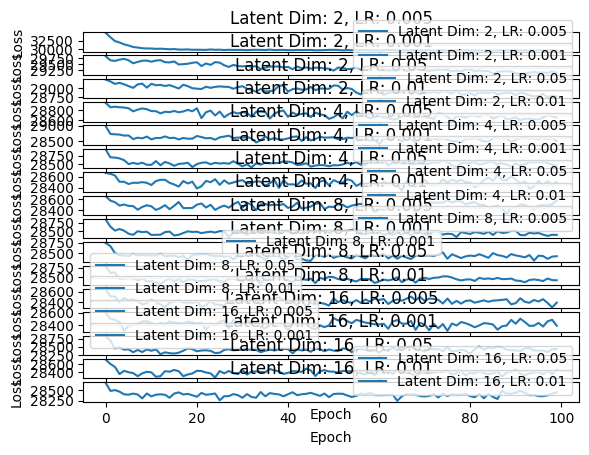

In [59]:
# Assuming you have a list of hyperparameter combinations
# hyperparameter_combinations = [(2, 0.001), (2, 0.01), (4, 0.001), ...]

# Create subplots for each hyperparameter combination
for i, (latent_dim, learning_rate) in enumerate(hyperparameter_combinations):
    # Get the loss values for this combination from history
    vae_model = VAE(latent_dim, learning_rate,encoder, decoder)
    vae_model.compile(optimizer=keras.optimizers.Adam())
      # Train the model on the training data
    history = vae_model.fit(x, epochs=100, batch_size=10)
    loss_values = history.history['loss']

    # Plot the loss curve
    plt.subplot(len(hyperparameter_combinations), 1, i+1)  # Adjust subplot layout
    plt.plot(loss_values, label=f"Latent Dim: {latent_dim}, LR: {learning_rate}")
    plt.title(f"Latent Dim: {latent_dim}, LR: {learning_rate}")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()


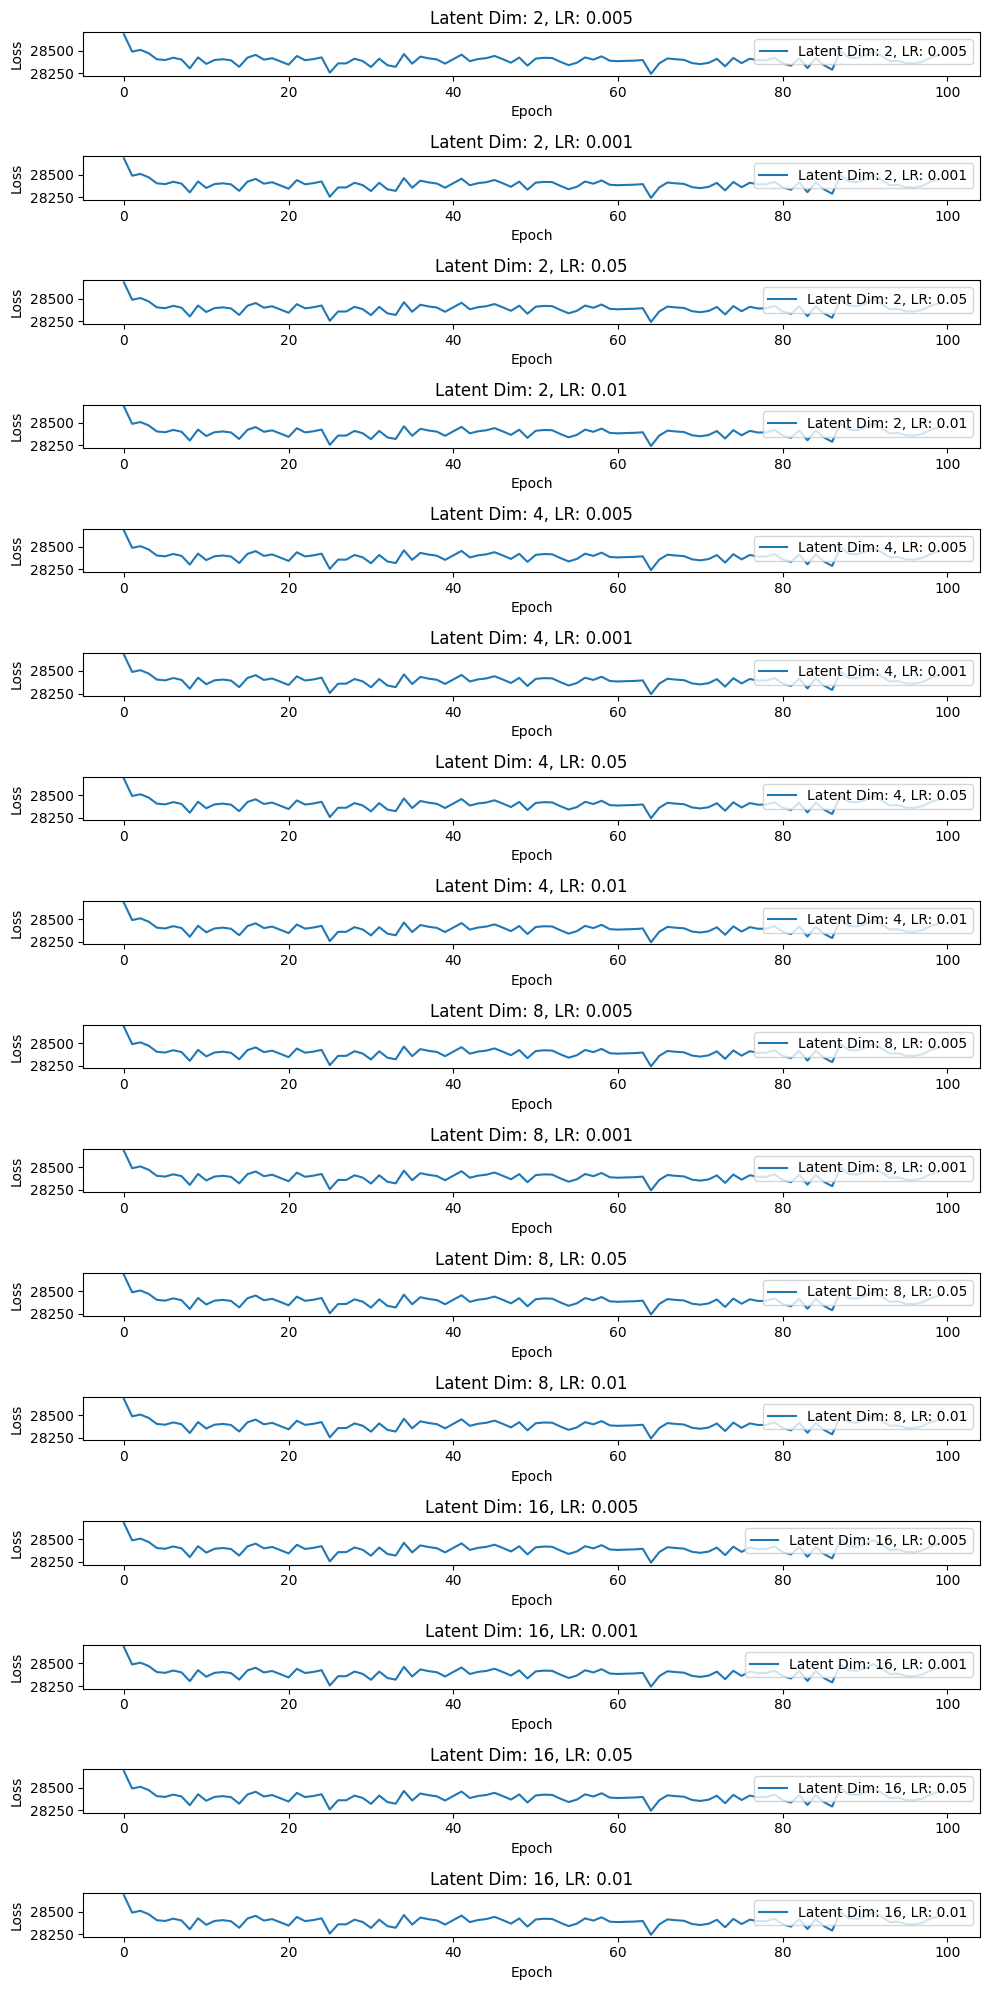

In [66]:
import matplotlib.pyplot as plt

# Create a figure with a larger size
fig = plt.figure(figsize=(10, 20))  # Adjust the width and height as needed

# Assuming you have a list of hyperparameter combinations
# hyperparameter_combinations = [(2, 0.001), (2, 0.01), (4, 0.001), ...]

# Create subplots for each hyperparameter combination
for i, (latent_dim, learning_rate) in enumerate(hyperparameter_combinations):
    # Get the loss values for this combination from history

    loss_values = history.history['loss']

    # Add subplots within the larger figure
    ax = fig.add_subplot(len(hyperparameter_combinations), 1, i+1)

    # Plot the loss curve
    ax.plot(loss_values, label=f"Latent Dim: {latent_dim}, LR: {learning_rate}")
    ax.set_title(f"Latent Dim: {latent_dim}, LR: {learning_rate}")
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Loss")
    ax.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show or save the figure
plt.show()  # Use plt.savefig("filename.png") to save the figure if needed


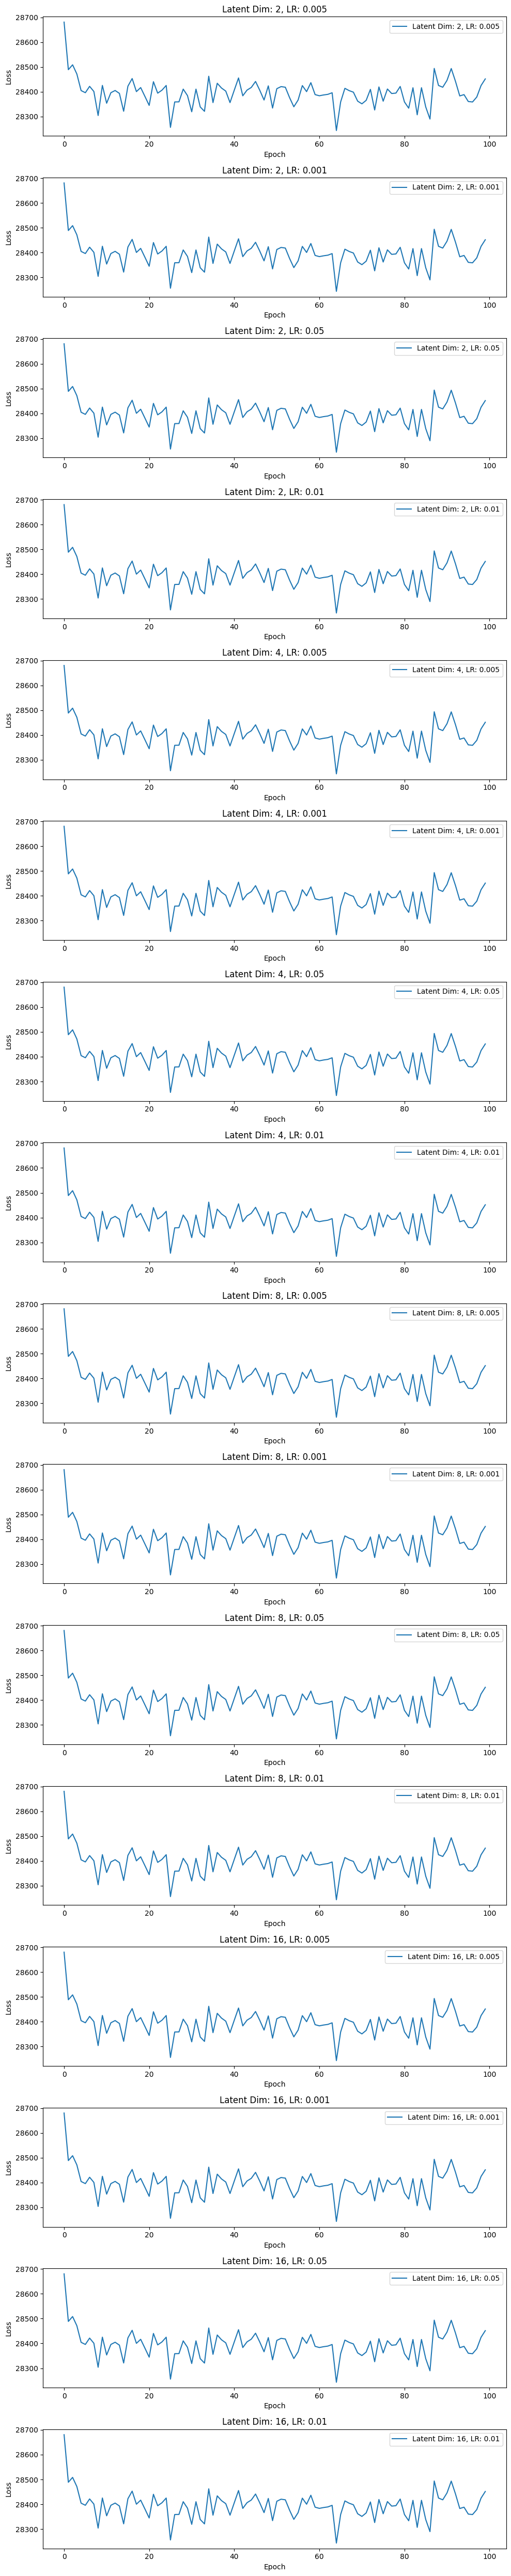

In [67]:
import matplotlib.pyplot as plt

# Create a figure with a larger size
fig = plt.figure(figsize=(10, 50))  # Adjust the width and height as needed

# Assuming you have a list of hyperparameter combinations
# hyperparameter_combinations = [(2, 0.001), (2, 0.01), (4, 0.001), ...]

# Create subplots for each hyperparameter combination
for i, (latent_dim, learning_rate) in enumerate(hyperparameter_combinations):
    # Get the loss values for this combination from history

    loss_values = history.history['loss']

    # Add subplots within the larger figure
    ax = fig.add_subplot(len(hyperparameter_combinations), 1, i+1)

    # Plot the loss curve
    ax.plot(loss_values, label=f"Latent Dim: {latent_dim}, LR: {learning_rate}")
    ax.set_title(f"Latent Dim: {latent_dim}, LR: {learning_rate}")
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Loss")
    ax.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show or save the figure
plt.show()  # Use plt.savefig("filename.png") to save the figure if needed
